<div style="width:100%;height:60px">
<div style="width:60%;height:50px;float:left;"><h2> Information Theory  (UAI/500) </h2></div>
<div style="width:40%;height:50px;float:left;"><img src="img/JCU_DCS.png" width=200px align=right/> </div>
</div>
<div style="width:100%;height:5px;background-color:#408d62"></div>
<h2>Lecture Notebook</h2>

<h4>Lecturer: Ivo Bukovsky</h4>

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>


<h2>Something about Data and Systems that Generate them</h2>
<ul>
<li> Data generating systems:<br>
     - Stochastic (random process), <br>
     - Deterministic <br>
     - Chaotic (deterministic chaos,logistic eq. example)<br>
     - Real (...omg)
</li>
<li> Anomaly detection: probabilistic or machine learning based ? </li>
</ul>   

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>

### Note on Deterministic Chaos

It can be good to aware of what deterministic chaos is (i.e., an unpredictable behavior of data generated by a deterministic governing law), just be aware it exists, ...)

Example of a very complex dynamical systems, or a very complex governing lar in machine learning are reccurent neural networks (the ones with some kind of feedback, tapped delays,...). However do not panic, chaotic development in them can be very rare...   

#### Example of Logistic Equation

The behavior of data (here scalar variable $y$) is driven by a deterministic governing law as follows
<div style="width:100%;height:30px;margin-top:10px">
    <div style="width:90%;height:30px;float:left;text-align:center">$y(k)=a\cdot y(k-1)\cdot (1-y(k-1),$</div>
    <div style="width:10%;height:30px;float:left;text-align:right"">(1)</div>
</div>

where $k$ is diskrete index of time, $y$ is generated data (e.g., it has been demonstrated that extended to 3-D problem it works as an insect population [2]), $a$ is called a bifurcattion parameter (it changes qualitative behavior of generated data).

 - What happens if we change $a$?
 - What happens if we keep $a=const.$ and change the initial condition $y(k=0)$ to $y(0)=y(0)+ \text{"a butterfly"}$ where the "butterfly" is a very small number?

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

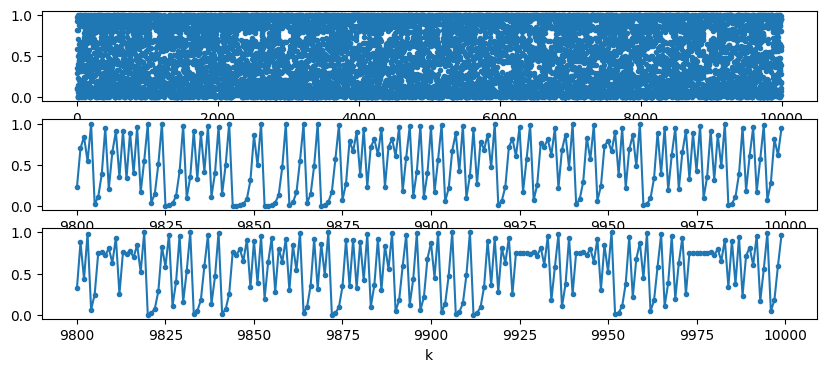

In [46]:
%matplotlib inline
#%matplotlib notebook
from numpy import *
from matplotlib.pyplot import *


a=4  # biffurcation parameter
N=10000
y=zeros(N)
y[0]=.1  # init. cond.
for k in range(1,N):
    y[k]=a*y[k-1]*(1-y[k-1])

z=zeros(N)
z[0]=0.1000001  # init. cond.
for k in range(1,N):
    z[k]=a*z[k-1]*(1-z[k-1])

figure(figsize=(10,4))
subplot(311)
plot(y,'.')
subplot(312)
plot(range(N-200,N),y[-200:],'.-'),xlabel('k')
subplot(313)
plot(range(N-200,N),z[-200:],'.-'),xlabel('k')
show()


Fig. 1: The detail of last 200 samples differs due to a very small distinction in initial conditions ($y(k=0)=0.1, z(k=0)=y(k=0)+0.000001$, i.e. this is the butterfly efffect where $0.000001$ is the "butterfly" here. Also, notice, that the flat data behavior around $k=9925$ or $k=9975$ may seems to be an anomaly in sense of probability, but not in sense of the governing law that is the same for all $k$. (and may be learned from data ...if done properly...)

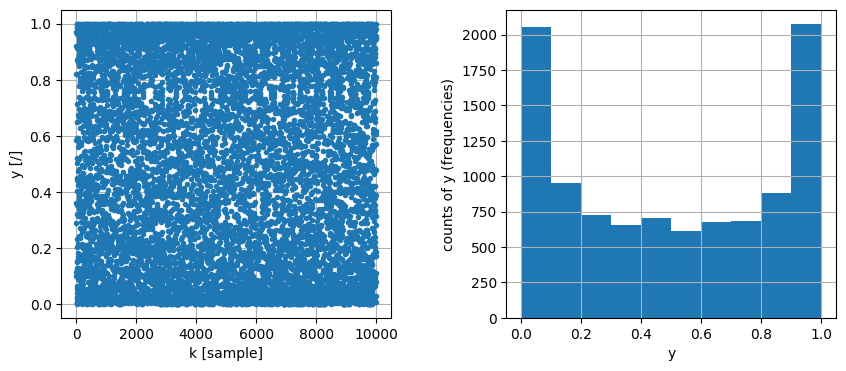

In [47]:
figure(figsize=(10,4))
subplots_adjust(wspace=.35)
subplot(121)
xlabel("k [sample]"); ylabel("y [/]")
plot(y,'.');grid()
subplot(122)
hist(y,10)
grid( );xlabel("y");ylabel("counts of y (frequencies)")
show()

In [ ]:
savetxt("y.txt",y)

<div style="widht:100%;height:2px;background-color:#408d62"></div>

### Example L-7

Let's play a little bit with theoretical data generated by chaotic system (1) and practice some basic statistical techniques.

Generate or use those 10 000 samples by system (1) for random initial condition $0<y(0)<1$ with $a=4$ (as done above).

Now, let's forget about how you generated time series $y$ and consider $y$ be a continuous random variable observed at every sample time $k=0,1,2,...,9 \ 999$.
<ol>
    <b>Sliding window excersize</b>:
    <li> The time serie is long $N=10 \ 000$ data samples. Calculate and draw mean trajectory and variance trajectory for a sliding window of lenght 5,10,30,100,1000 samples with 1-sample sliding. What is the shortest window where mean and variance are stationary? (stationaty in a loose sense, show and discuss your result and your opinion)<b style="color:blue;">[0.6 Points]</b></li>
    <hr>
    <b>1-D probability:</b>
    <li>Estimate the probability mass function via histogram $p(y) \ \forall y$ and discuss your selection of number of bins (reason for your choice, how does it affect $p(y)$? <b style="color:blue;">[0.4 Points]</b></li>
      <li>
    Calculate and plot the probability of each individual sample point $y(k) \ \forall k$, i.e., horizontal axis is time index $k=1,2,...,N$, vertical axis shows $p\big(y(k)\big)$<b style="color:blue;">[0.6 Points]</b></li>
    <hr>
    <b>2-D probability:</b>
    <li>Estimate the 2-D probability mass function $p\big(y,y_{previous})\big) \ \forall y$ , show the 2-D plot and briefly discuss your solution (you can use Numpy or some existing libraries(reference the library and briefly explain the principles that the library applies). <b style="color:blue;">[0.8 Points]</b> </li>
    <li>Estimate the 2-D conditional probability function $p\big(y|y_{previous})\big) \ \forall y$ , show the 2-D plot and briefly discuss your solution (you can use Numpy or some existing libraries(reference the library and briefly explain the principles that the library applies):<br>
        a) Estimate $p\big(y|y_{previous}\big)$ directly from the sequence of data (time series) <b style="color:blue;">[0.8 Points]</b></li>
        a) Estimate $p\big(y|y_{previous}\big)$ by the Bayes rule using $p\big(y,y_{previous}\big)$ and $p(y_{previous})$ <b style="color:blue;">[1 Points]</b>
</li>
 <li>     Calculate and plot the probability of each individual data point $\textbf{x}(k)=[y(k),y(k-1)]$ where horizontal axis is time index $k$, and the vertical axis shows $p([y(k),y(k-1)])$<b style="color:blue;">[0.6 Points]</b></li>
</ol>

![image-3.png](attachment:image-3.png)

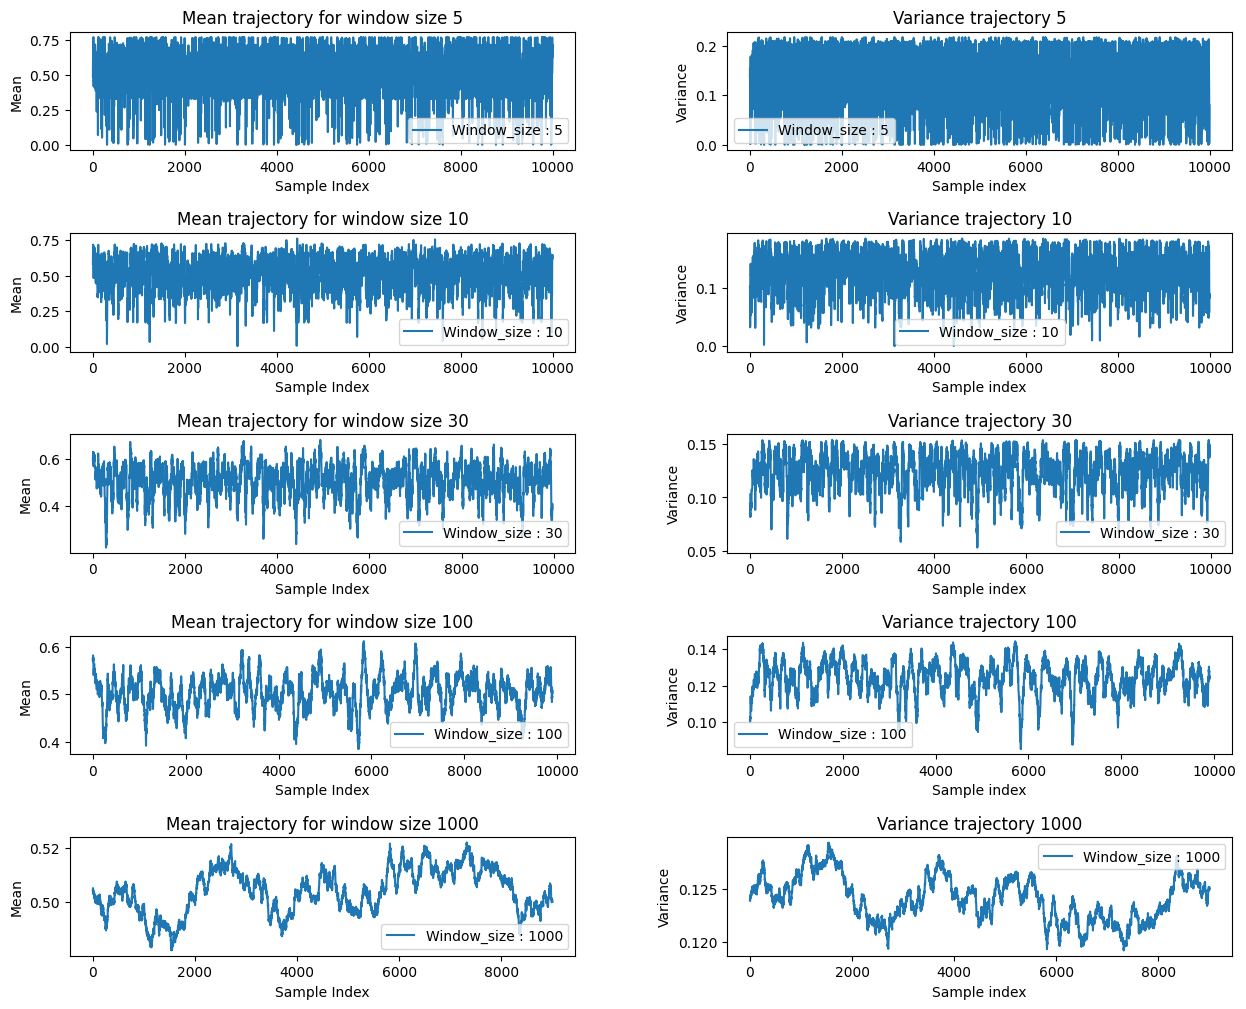

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""Sliding window excersize:
1) The time serie is long  N=10 000  data samples. Calculate and draw mean trajectory and variance trajectory for a sliding window of lenght 5,10,30,100,1000 samples with 1-sample sliding.
    What is the shortest window where mean and variance are stationary?"""

a=4  # biffurcation parameter
N=10000

initial_condition = np.random.rand()  # Random initial condition 0 < y(0) < 1
y = np.zeros(N)
y[0] = float(initial_condition)

for k in range(1,N):
  y[k] = a * y[k-1] * (1-y[k-1])      # logistic map function

window_sizes = [5, 10, 30, 100, 1000]  # window sizes

# Function to calculate mean and variance for time series data
def window_sliding(data, window_size):
  series = pd.Series(data)
  mean_rolling = series.rolling(window = window_size).mean().dropna().values
  var_rolling = series.rolling(window = window_size).var().dropna().values
  return mean_rolling, var_rolling

result = {}
for i in window_sizes:
  mean, variance = window_sliding(y, i)
  result[i] = (mean, variance)


# plotting the function
plt.figure(figsize=(15, 12))

for i, window_size in enumerate(window_sizes):
  means, variances = result[window_size]

  plt.subplot(5,2,2*i+1)
  plt.plot(means, label = f'Window_size : {window_size}')
  plt.title(f'Mean trajectory for window size {window_size}')
  plt.xlabel('Sample Index')
  plt.ylabel('Mean')
  plt.legend()

  plt.subplot(5,2,2*i+2)
  plt.plot(variances, label = f'Window_size : {window_size}')
  plt.title(f'Variance trajectory {window_size}')
  plt.xlabel('Sample index')
  plt.ylabel('Variance')
  plt.legend()

plt.subplots_adjust(wspace=0.3, hspace=0.7)
plt.show()

Window size 5 and 10 - The trajectories exhibit high fluctuations due to the
small window size. The time series shows chaotic behavior and these small windows are not enough to smooth out the noise. The variance fluctuates wildly, indicating non-stationarity.

Window size 30 - The fluctuations in both mean and variance start to decrease, but there is still some noticeable variation. This suggests some initial stabilization, but the system has not fully reached stationarity.

Window size 100 - Both the mean and variance appear to be more stable compared to smaller window sizes. Although there are still minor variations, the system is much closer to stationarity

Window size 1000 - Here, the mean and variance show very little change over time. This large window size effectively smooths the data, suggesting that the system has become stationary.


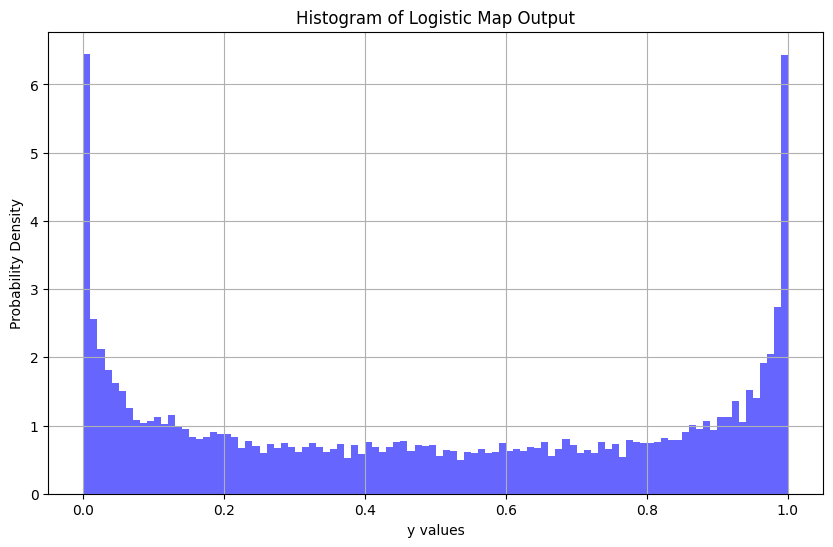

In [48]:
"""2) Estimate the probability mass function via histogram  p(y) ∀y  and discuss your selection of number of bins (reason for your choice, how does it affect  p(y) ?
"""

num_bins = int(np.sqrt(N))

plt.figure(figsize=(10, 6))
plt.hist(y, bins=num_bins, density=True, alpha=0.6, color='b')

# Adding titles and labels
plt.title('Histogram of Logistic Map Output')
plt.xlabel('y values')
plt.ylabel('Probability Density')
plt.grid()
plt.show()

I have used the square root of the sample size as the appropriate choice for selecting the bins as it balances the detail and smoothness in the distribution.

If the number of bins is too low, the histogram will be overly simplistic, failing to capture the nuances of the distribution. Important features such as peaks and valleys may be lost, making it hard to discern the actual shape of the PMF.

Conversely, using too many bins can result in a noisy histogram that fluctuates widely. This is particularly problematic with limited data points, as random variations may appear as significant features of the distribution which can mislead interpretations.

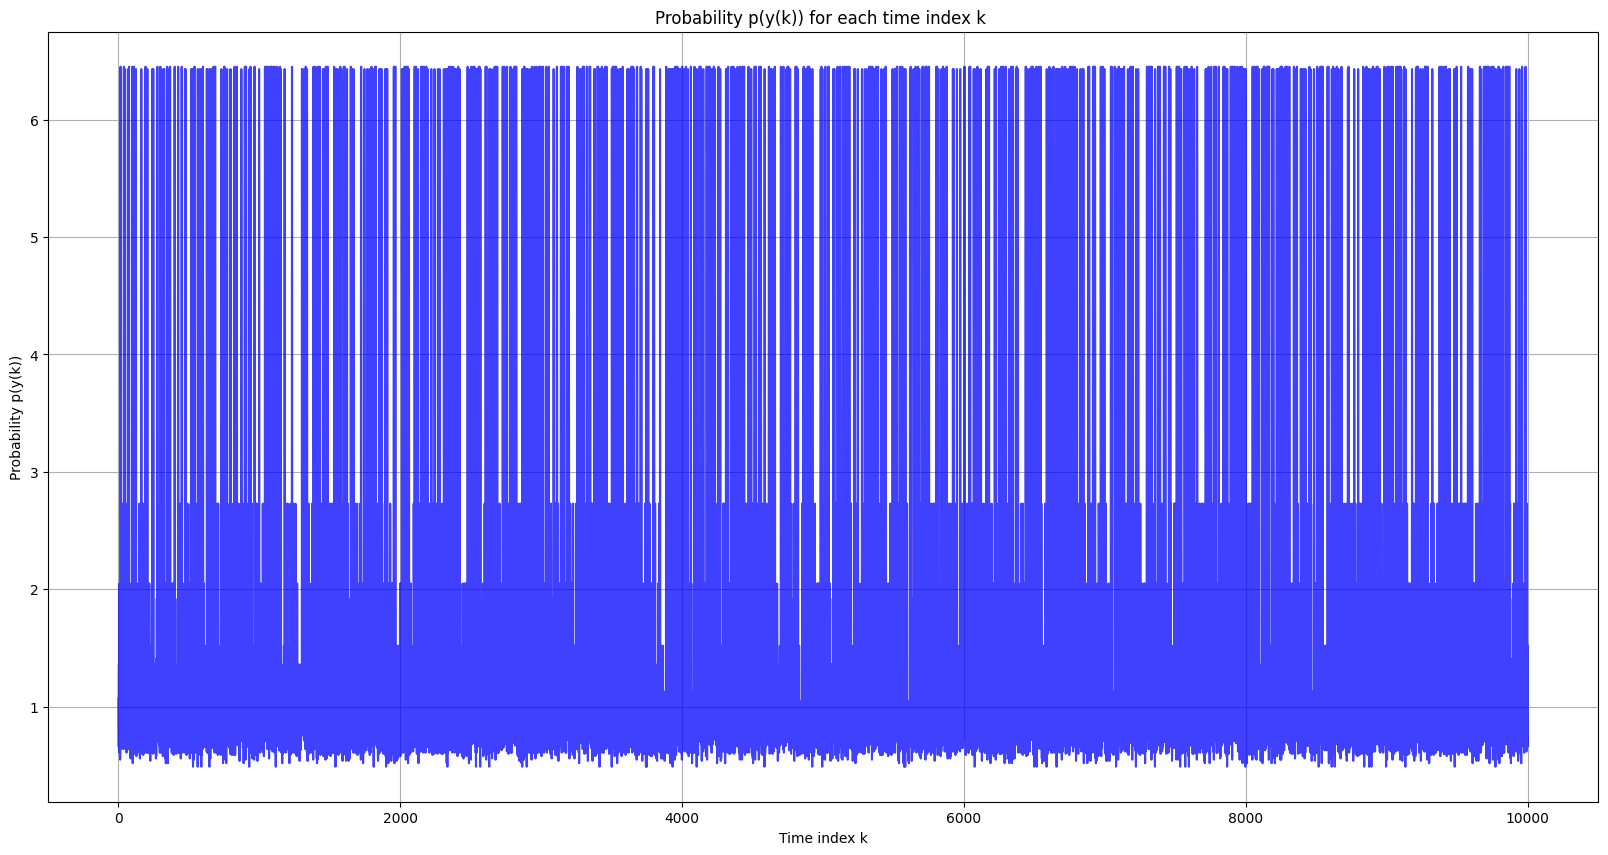

In [49]:
""" 3)Calculate and plot the probability of each individual sample point  y(k) ∀k , i.e., horizontal axis is time index  k=1,2,...,N , vertical axis shows  p(y(k))?
"""

num_bins = int(np.sqrt(N))  # Number of bins
hist, bin_edges = np.histogram(y, bins=num_bins, density=True)

bin_indices = np.digitize(y, bin_edges[:-1]) - 1  # Bins are indexed from 0
bin_indices[bin_indices >= num_bins] = num_bins - 1  # Correct out-of-bound indices

# Get the probability for each y(k) based on the corresponding bin
prob_yk = hist[bin_indices]

# Step 3: Plot p(y(k)) for each k (time index)
plt.figure(figsize=(20, 10))
plt.plot(range(1, N+1), prob_yk, color='blue', alpha=0.75)
plt.title('Probability p(y(k)) for each time index k ')
plt.xlabel('Time index k')
plt.ylabel('Probability p(y(k))')
plt.grid(True)

plt.show()

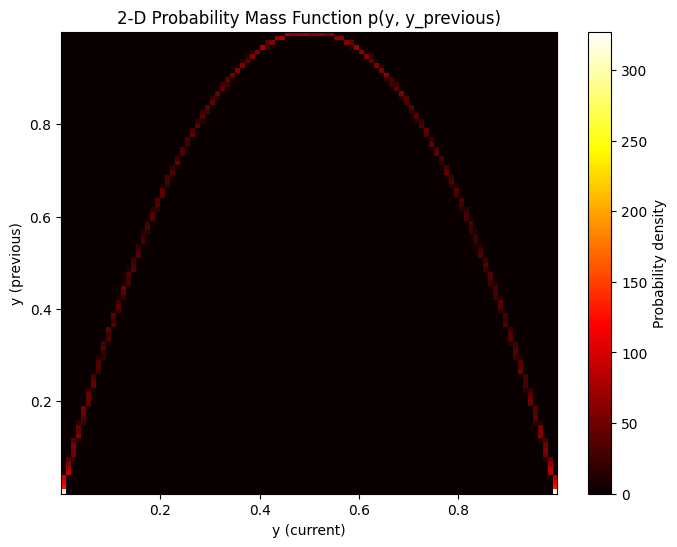

In [50]:
"""4) Estimate the 2-D probability mass function  p(y,yprevious)) ∀y  , show the 2-D plot and briefly discuss your solution
"""

y_previous = y[:-1]  # y(k-1)
y_current = y[1:]    # y(k)

# Step 2: Compute the 2-D histogram to estimate joint distribution p(y, y_previous)
num_bins = int(np.sqrt(N))  # Set the number of bins
hist, xedges, yedges = np.histogram2d(y_previous, y_current, bins=num_bins, density=True)

# Step 3: Plot the 2-D PMF as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot')
plt.colorbar(label='Probability density')
plt.title('2-D Probability Mass Function p(y, y_previous)')
plt.xlabel('y (current)')
plt.ylabel('y (previous)')
plt.grid(False)
plt.show()

The plot exhibits a structured pattern, particularly with prominent regions in the lower-middle of the graph. This behavior is a result of the chaotic nature of the logistic map at a=4, where the system oscillates between different regions of the state space.

The relationship between y and yprevious shows significant density in certain areas, reflecting where the system spends more time.

We used numpy.histogram2d to compute the joint histogram of y and yprevious
​By normalizing the counts into probabilities, we obtain a 2D PMF, which is visualized with a heatmap using matplotlib. This approach allows us to estimate the density of points in the phase space, capturing the dynamics of the system.

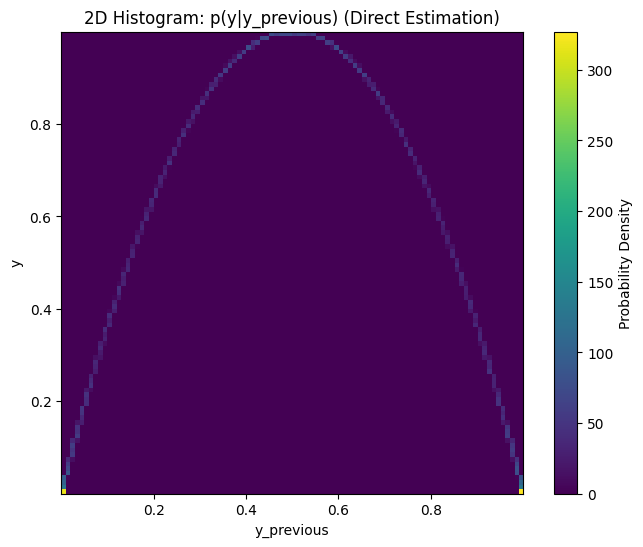

In [53]:
""" 5) Estimate the 2-D conditional probability function  p(y|yprevious)) ∀y  , show the 2-D plot and briefly discuss your solution :
a) Estimate  p(y|yprevious)  directly from the sequence of data (time series)

"""
y_previous = y[:-1]  # y(k-1)
y_current = y[1:]    # y(k)

num_bins = int(np.sqrt(N))  # Set the number of bins for histogram

# 2D histogram (joint distribution of y and y_previous)
hist, xedges, yedges = np.histogram2d(y_previous, y_current, bins=num_bins, density=True)

# Plotting the 2D histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', cmap='viridis', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Probability Density')
plt.title('2D Histogram: p(y|y_previous) (Direct Estimation)')
plt.xlabel('y_previous')
plt.ylabel('y')
plt.show()

This method simply counts the occurrences of each pair (yprevious,y) and normalizes the counts to represent the probability density.

In the direct estimate, the conditional probabilities are approximated but may not sum to 1 for each yprevious. This could lead to inaccuracies in interpreting the probability distribution.

The direct estimate might reflect the raw frequencies more accurately, but it's also more susceptible to sampling noise.

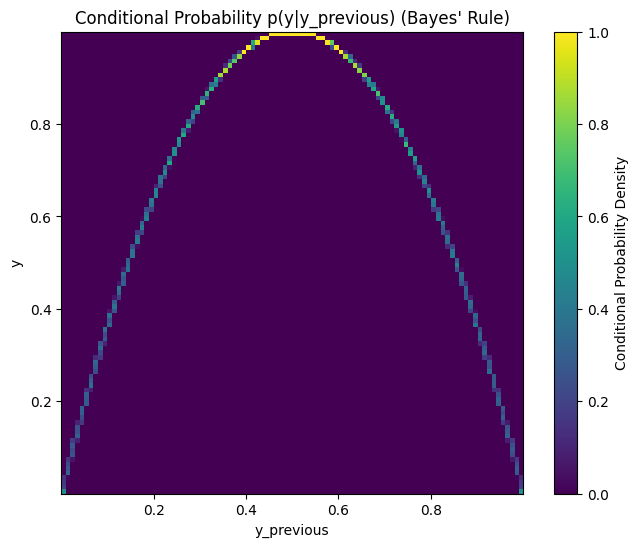

In [54]:
"""5 b) Estimate  p(y|yprevious)  by the Bayes rule using  p(y,yprevious)  and  p(yprevious)
"""

# Calculate the marginal distribution p(y_previous)
p_y_previous = np.sum(hist, axis=1)  # Marginalize over y (sum across rows)

# Avoid division by zero by ensuring no zero values in p_y_previous
p_y_previous = np.where(p_y_previous == 0, 1e-10, p_y_previous)

# Use Bayes' rule to calculate p(y|y_previous)
p_y_given_y_previous = hist / p_y_previous[:, np.newaxis]

# Plot the conditional probability p(y|y_previous) using Bayes' rule
plt.figure(figsize=(8, 6))
plt.imshow(p_y_given_y_previous.T, origin='lower', cmap='viridis', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Conditional Probability Density')
plt.title('Conditional Probability p(y|y_previous) (Bayes\' Rule)')
plt.xlabel('y_previous')
plt.ylabel('y')
plt.show()

This method ensures that for each value of yprevious, the sum of the conditional probabilities across all possible values of y is 1.

By explicitly normalizing the joint distribution using the marginal
 p(yprevious), this method gives a more accurate and consistent representation of the conditional probabilities.

 The resulting graph is smoothed and better conforms to the probabilistic interpretation, removing noise and better highlighting the regions where the probabilities are highest.

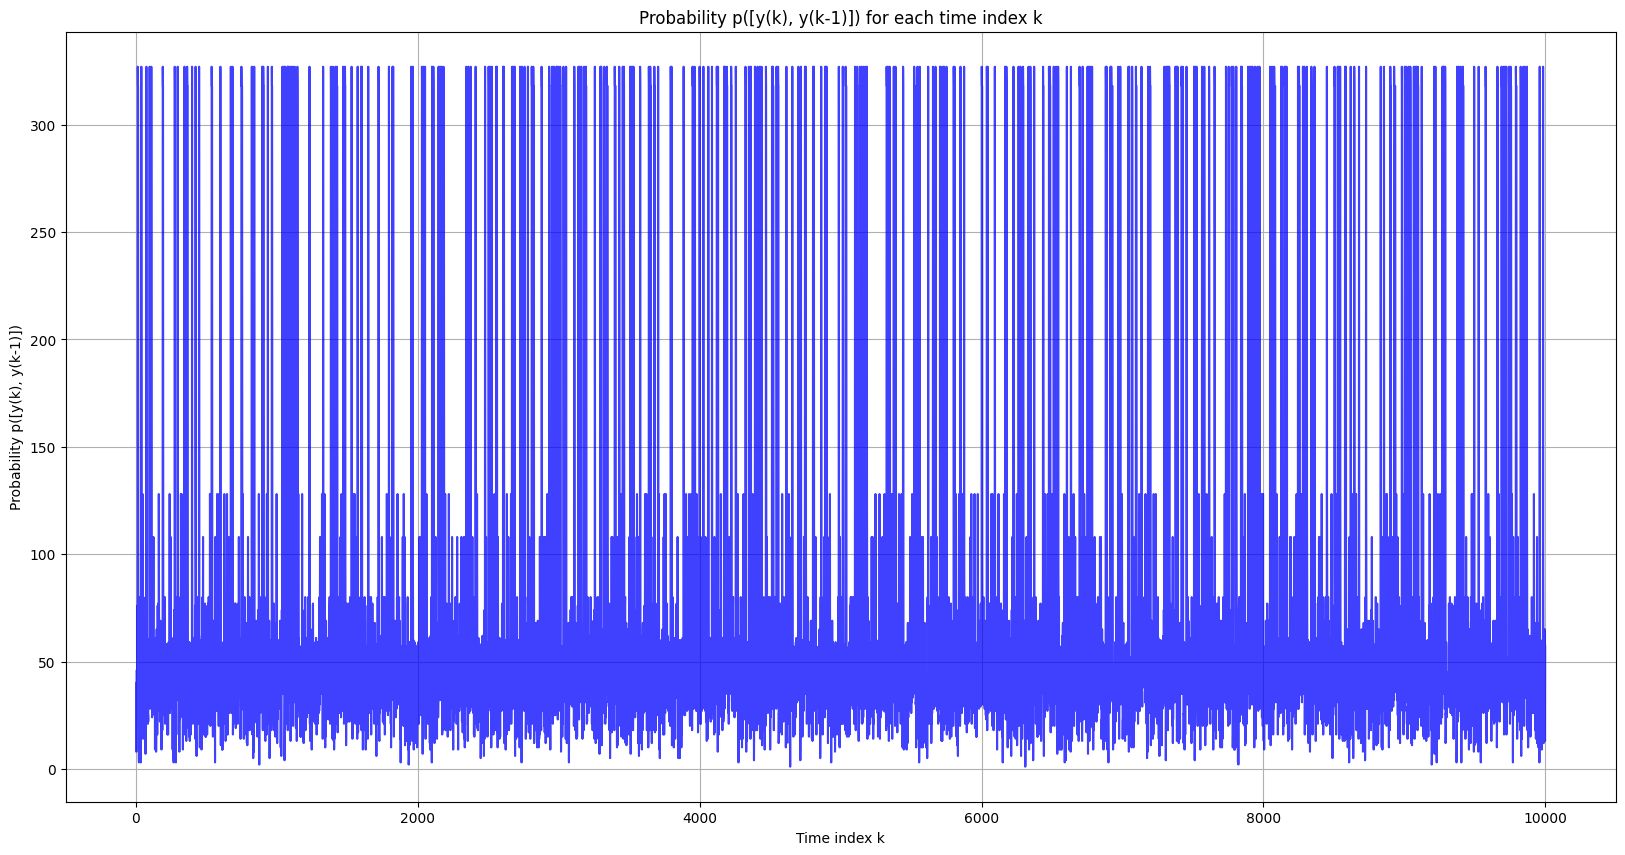

In [51]:
""" 6) Calculate and plot the probability of each individual data point  x(k)=[y(k),y(k−1)]
      where horizontal axis is time index  k , and the vertical axis shows  p([y(k),y(k−1)])
"""

y_previous = y[:-1]  # y(k-1)
y_current = y[1:]    # y(k)

# Step 2: Compute the 2-D histogram to estimate joint distribution p(y, y_previous)
num_bins = int(np.sqrt(N))  # Set the number of bins
hist, xedges, yedges = np.histogram2d(y_current, y_previous, bins=num_bins, density=True)

# Step 3: Assign probabilities to each data point x(k) = [y(k), y(k-1)]
# Find the bin indices for each (y(k), y(k-1)) pair
bin_x_indices = np.digitize(y_current, xedges[:-1]) - 1  # for y(k)
bin_y_indices = np.digitize(y_previous, yedges[:-1]) - 1  # for y(k-1)

# Correct out-of-bound indices
bin_x_indices[bin_x_indices >= num_bins] = num_bins - 1
bin_y_indices[bin_y_indices >= num_bins] = num_bins - 1

# Get the probability for each x(k) = [y(k), y(k-1)] based on the corresponding bin
prob_xk = hist[bin_x_indices, bin_y_indices]

# Step 4: Plot p([y(k), y(k-1)]) for each k (time index)
plt.figure(figsize=(20, 10))
plt.plot(range(1, N), prob_xk, color='blue', alpha=0.75)
plt.title('Probability p([y(k), y(k-1)]) for each time index k')
plt.xlabel('Time index k')
plt.ylabel('Probability p([y(k), y(k-1)])')
plt.grid(True)

plt.show()

<div style="widht:100%;height:5px;background-color:#408d62"></div>
<h2>Points and Assigments (week 3):</h2>

If you wish to submit your solutions to collect your optional points, solve the problems in this notebook directly and upload to Moodle within 2 weeks.

In this notebook, you may collect maximum of 3 points (though the total sum of points available in this notebook is more).

<div style="widht:100%;height:5px;background-color:#408d62"></div>
<h3> References </h3>
<br>


<div style="width:100%;">
<div style="width:5%;float:left;">[a] </div>
<div style="width:95%;float:left;align:justify;">J. Gleick, Chaos: making a new science, 20th anniversary ed. New York, N.Y: Penguin Books, 2008.
 </div></div>

<div style="width:100%;">
<div style="width:5%;float:left;">[b] </div>
<div style="width:95%;float:left;align:justify;"><a href="https://books.google.cz/books?id=POPtCAAAQBAJ&pg=PA39&lpg=PA39&dq=chaos+beetle+census&source=bl&ots=cDjhgF3Lpp&sig=ACfU3U1q9hnMc5rlHRq7EmmJBUUHLA0ORA&hl=en&sa=X&ved=2ahUKEwjvodak-9jzAhWAgP0HHbWCB5sQ6AF6BAgIEAM#v=onepage&q=chaos%20beetle%20census&f=false">LAB VISIT | Boom, Bust, and Chaos in the Beetle Census </a>, section in K. Alligood, T. Sauer, and J. A. Yorke, Chaos: An Introduction to Dynamical Systems. Springer, 2012.
 </div></div>





<hr>

<b>Basic Reading:</b>

[1]  MACKAY, David J. C. Information theory, inference, and learning algorithms. Cambridge: Cambridge University Press, 2003. ISBN 978-0-521-64298-9..  <br>

<b>Recommended Reading: </b>

[2] COVER, T. M. and Joy A. THOMAS. Elements of information theory. 2nd ed. Hoboken: Wiley-Interscience, c2006. ISBN 978-0-471-24195-9..<br>
[3] HOST, S. Information and Communication Theory. Hoboken, NJ: Wiley-IEEE Press, 2019. ISBN 978-1119433781..<br>
[4] EL-GAMAL, A. and YOUNG-HAN, K. Network information theory. Primera. Cambridge: Cambridge University Press, 2011. ISBN 978-1-107-00873-1..

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>



<br>

<div style="width:100%;height:20px;background-color:#408d62"></div>
<br>

<div style="width:100%;height:30px">
<div style="width:70%;height:30px;float:left;text-align:center;font-size:10px">&#169;  Ivo Bukovsky, Dpt. of Comp. Sci., USB in CB, 2021 </div>
<div style="width:30%;height:30px;float:left;"><img src="img/JCU_DCS.png" style="height:30px;"/> </div>
</div>


